In [140]:
# Import necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kstest
import numpy as np

%matplotlib inline

In [98]:
# Read in data for test.
data = pd.read_csv('data/Pokemon.csv', index_col=0)

In [99]:
# Explore data.
data[0:3]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [103]:
# Detect the category data columns, as well as numerical columns in dataframe.
id_columns = ['Name']
cate_columns = []
num_columns = []
for key in data.dtypes.keys():
    if key in id_columns:
        continue
    if data.dtypes[key] not in ['float', 'int']:
        cate_columns.append(key)
        data[key] = data[key].astype('object')
    else:
        num_columns.append(key)

### Numerical Data Column.

In [137]:
# Normalization to [0, 1], using Max-min method.
parameter_dic = {}
for column in num_columns:
    max_num = max(data[column])
    min_num = min(data[column])
    parameter_dic[column] = [max_num, min_num]
    # Convert number into suitable format.
    data[column] = (data[column]-min_num)/float(max_num-min_num)

In [141]:
# Convert numerical columns whose distributions are not normal to normal distribution.
# Check whether the distribution is normal or not.
for column in num_columns:
    p_value = kstest(data[column], 'norm')[1]
    # When p-value is under 0.05, it means the distribution is different to normal distribution.
    if p_value < 0.05:
        # Calculate skewness of distribution.
        skewness = data[column].skew(axis=0)
        # If positive skewed data, use log transformation.
        if skewness > 0:
            data[column] = np.log((0.001 + data[column]))
        # If negative skewed data, use square transformation.
        else:
            data[column] = np.square(data[column])

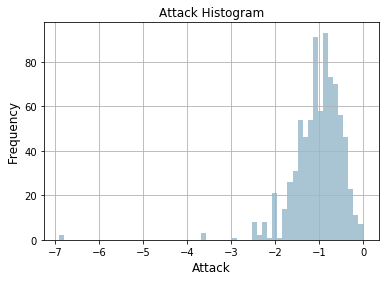

In [142]:
# Plot distribution.
fig, ax = plt.subplots()
data['Attack'].hist(color='#A9C5D3', bins=60)
ax.set_title('Attack Histogram', fontsize=12)
ax.set_xlabel('Attack', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [143]:
data.skew(axis=0)

Total        -2.122280
HP           -3.199026
Attack       -3.235964
Defense      -3.102321
Sp. Atk      -2.636843
Sp. Def      -2.886234
Speed        -2.682630
Generation   -1.328981
dtype: float64

### Category data columns.

In [84]:
# Fill None with 'Unknown' for category columns and fill None with -1 for numerical columns.
data[cate_columns] = data[cate_columns].fillna('Unknown')
data[num_columns] = data[num_columns].fillna('-1')

In [48]:
# Describe the category distribution of columns.
data['Type 2'].value_counts()

Unknown     386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ghost        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [85]:
# Combine categories whose ratio are under 0.01 into one 'Others' category.
for column in cate_columns:
    total_num = float(sum(data[column].value_counts()))
    discard_column = []
    for key in data[column].value_counts().keys():
        if data[column].value_counts()[key]/total_num < 0.01:
            discard_column.append(key)
    data[column] = data[column].replace(discard_column, 'Others')

In [90]:
# Encode category columns with One-hot Encoding method.
data = pd.get_dummies(data, columns=cate_columns)